In [1]:
import numpy as np
import pandas as pd
#tfidf

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
beer_review = pd.read_csv('/Users/ilyasshomayev/work/projects/beer_review/top_reviews.csv')

In [4]:
beer_review.head(30)

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,12.00%\n\t\t,Gtreid,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,Today at 06:45 PM,feel: 5,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 4.75,#1,4.83,-1%,4.78,smell: 4.75,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,12.00%\n\t\t,Eiwatts9,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,Monday at 12:59 AM,feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,12.00%\n\t\t,KrajDoesBeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 12, 2017",feel: 5,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.1%,4.93,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,12.00%\n\t\t,Billy_Bars,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 05, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.3%,4.94,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,12.00%\n\t\t,crobinso,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 04, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
5,12.00%\n\t\t,billydrinksbeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev Wow. More than lucky to be able to split ...,"Oct 04, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+1.4%,4.90,smell: 5,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
6,12.00%\n\t\t,Stupac22,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 02, 2017",feel: 5,Iowa,United States,look: 4.5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+0.4%,4.85,smell: 4.5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
7,12.00%\n\t\t,SourTweek,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Sep 27, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
8,12.00%\n\t\t,Blinkyoureyes,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Sep 19, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
9,12.00%\n\t\t,Aglassdarkley,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Sep 11, 2017",feel: 2,Iowa,United States,look: 3.75,Kentucky Brunch Brand Stout,overall: 2,#1,4.83,-52.6%,2.29,smell: 2.75,taste: 2,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [ ]:
beer_review.abv.unique()


In [ ]:
beer_review[beer_review.abv == ' 29.00%\n\t\t'].name.unique()

In [14]:
beer_review.abv = beer_review.abv.str.strip().str.replace('%','')

In [15]:
beer_review.head(20)

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,12.00,Gtreid,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,Today at 06:45 PM,feel: 5,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 4.75,#1,4.83,-1%,4.78,smell: 4.75,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,12.00,Eiwatts9,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,Monday at 12:59 AM,feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,12.00,KrajDoesBeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 12, 2017",feel: 5,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.1%,4.93,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,12.00,Billy_Bars,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 05, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.3%,4.94,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,12.00,crobinso,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 04, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
5,12.00,billydrinksbeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev Wow. More than lucky to be able to split ...,"Oct 04, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+1.4%,4.90,smell: 5,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
6,12.00,Stupac22,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Oct 02, 2017",feel: 5,Iowa,United States,look: 4.5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+0.4%,4.85,smell: 4.5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
7,12.00,SourTweek,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Sep 27, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
8,12.00,Blinkyoureyes,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Sep 19, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
9,12.00,Aglassdarkley,American Double / Imperial Stout,Toppling Goliath Brewing Company,rDev,"Sep 11, 2017",feel: 2,Iowa,United States,look: 3.75,Kentucky Brunch Brand Stout,overall: 2,#1,4.83,-52.6%,2.29,smell: 2.75,taste: 2,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [16]:
beer_review.beer_type.unique()

array(['American Double / Imperial Stout',
       'American Double / Imperial IPA', 'Quadrupel (Quad)',
       'American IPA', 'Old Ale', 'American Stout', 'American Porter',
       'Milk / Sweet Stout', 'American Barleywine', 'Oatmeal Stout',
       'Gueuze', 'Saison / Farmhouse Ale', 'American Pale Ale (APA)',
       'Berliner Weissbier', 'American Strong Ale', 'English Barleywine',
       'Lambic - Fruit', 'American Wild Ale', 'Hefeweizen',
       'Russian Imperial Stout', 'Flanders Red Ale', 'Dubbel',
       'Lambic - Unblended'], dtype=object)

In [17]:
beer_review[['beer_type', 'name']].drop_duplicates().groupby('beer_type').name.count()

beer_type
American Barleywine                  2
American Double / Imperial IPA      63
American Double / Imperial Stout    58
American IPA                        18
American Pale Ale (APA)             10
American Porter                     13
American Stout                       1
American Strong Ale                  5
American Wild Ale                   18
Berliner Weissbier                   3
Dubbel                               1
English Barleywine                   5
Flanders Red Ale                     1
Gueuze                               7
Hefeweizen                           1
Lambic - Fruit                       9
Lambic - Unblended                   1
Milk / Sweet Stout                   2
Oatmeal Stout                        2
Old Ale                              2
Quadrupel (Quad)                     4
Russian Imperial Stout              11
Saison / Farmhouse Ale              12
Name: name, dtype: int64

In [19]:
beer_review.content = beer_review.content.str.replace('rDev', '').str.strip()

In [20]:
beer_review.head(20)

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,12.00,Gtreid,American Double / Imperial Stout,Toppling Goliath Brewing Company,,Today at 06:45 PM,feel: 5,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 4.75,#1,4.83,-1%,4.78,smell: 4.75,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,12.00,Eiwatts9,American Double / Imperial Stout,Toppling Goliath Brewing Company,,Monday at 12:59 AM,feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,12.00,KrajDoesBeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 12, 2017",feel: 5,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.1%,4.93,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,12.00,Billy_Bars,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 05, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.3%,4.94,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,12.00,crobinso,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 04, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
5,12.00,billydrinksbeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,Wow. More than lucky to be able to split a bot...,"Oct 04, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+1.4%,4.90,smell: 5,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
6,12.00,Stupac22,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 02, 2017",feel: 5,Iowa,United States,look: 4.5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+0.4%,4.85,smell: 4.5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
7,12.00,SourTweek,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Sep 27, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
8,12.00,Blinkyoureyes,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Sep 19, 2017",feel: 5,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
9,12.00,Aglassdarkley,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Sep 11, 2017",feel: 2,Iowa,United States,look: 3.75,Kentucky Brunch Brand Stout,overall: 2,#1,4.83,-52.6%,2.29,smell: 2.75,taste: 2,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [21]:
print(beer_review[beer_review.date.str.contains('Today')].content.count())
print(beer_review[beer_review.date.str.contains('Tuesday')].content.count())
print(beer_review[beer_review.date.str.contains('Monday')].content.count())
print(beer_review[beer_review.date.str.contains('Sunday')].content.count())
print(beer_review[beer_review.date.str.contains('Saturday')].content.count())
print(beer_review[beer_review.date.str.contains('Friday')].content.count())
print(beer_review[beer_review.date.str.contains('Thursday')].content.count())
print(beer_review[beer_review.date.str.contains('Wednesday')].content.count())


17
69
67
118
96
45
0
0


In [39]:
beer_review[beer_review.date.str.contains('Oct.....2017')].date.sort_values(ascending = False)

192201    Oct 13, 2017
137204    Oct 13, 2017
128892    Oct 13, 2017
56204     Oct 13, 2017
49309     Oct 13, 2017
7097      Oct 13, 2017
48710     Oct 13, 2017
125043    Oct 13, 2017
161778    Oct 13, 2017
148323    Oct 13, 2017
161779    Oct 13, 2017
55162     Oct 13, 2017
22960     Oct 13, 2017
113512    Oct 13, 2017
19583     Oct 13, 2017
73257     Oct 13, 2017
54922     Oct 13, 2017
104655    Oct 13, 2017
189615    Oct 13, 2017
55163     Oct 13, 2017
65310     Oct 13, 2017
148327    Oct 12, 2017
181248    Oct 12, 2017
181247    Oct 12, 2017
148326    Oct 12, 2017
148325    Oct 12, 2017
148324    Oct 12, 2017
181246    Oct 12, 2017
27607     Oct 12, 2017
2         Oct 12, 2017
              ...     
176371    Oct 01, 2017
13308     Oct 01, 2017
141645    Oct 01, 2017
92780     Oct 01, 2017
153885    Oct 01, 2017
125885    Oct 01, 2017
11266     Oct 01, 2017
104389    Oct 01, 2017
161431    Oct 01, 2017
59802     Oct 01, 2017
59801     Oct 01, 2017
176370    Oct 01, 2017
153884    O

In [41]:
beer_review[beer_review.date.str.contains('Tuesday')].date

2044      Tuesday at 02:59 AM
8261      Tuesday at 09:24 PM
11506     Tuesday at 08:09 PM
12833     Tuesday at 06:49 PM
15329     Tuesday at 01:27 PM
17875     Tuesday at 11:08 AM
17876     Tuesday at 03:09 AM
20568     Tuesday at 02:31 AM
23508     Tuesday at 08:58 PM
26952     Tuesday at 02:31 PM
26953     Tuesday at 04:06 AM
27319     Tuesday at 02:09 AM
29361     Tuesday at 08:16 AM
35609     Tuesday at 05:20 PM
35610     Tuesday at 03:28 AM
35809     Tuesday at 02:51 AM
41534     Tuesday at 01:16 AM
49306     Tuesday at 11:16 PM
55156     Tuesday at 05:22 PM
57334     Tuesday at 06:47 PM
59788     Tuesday at 05:28 PM
74541     Tuesday at 09:28 PM
74890     Tuesday at 08:42 PM
76382     Tuesday at 01:29 AM
76383     Tuesday at 01:28 AM
78373     Tuesday at 02:35 PM
78840     Tuesday at 08:48 PM
84516     Tuesday at 02:35 AM
84916     Tuesday at 12:53 AM
87502     Tuesday at 09:52 PM
                 ...         
95064     Tuesday at 01:08 AM
100555    Tuesday at 02:42 AM
100557    

In [42]:
beer_review[beer_review.date.str.contains('Yesterday')].date

791       Yesterday at 04:30 PM
2836      Yesterday at 04:38 PM
7066      Yesterday at 10:43 PM
7091      Yesterday at 08:48 PM
7092      Yesterday at 04:39 PM
8260      Yesterday at 04:36 PM
9184      Yesterday at 04:23 PM
10128     Yesterday at 03:42 PM
10610     Yesterday at 04:36 PM
11469     Yesterday at 04:41 PM
11470     Yesterday at 03:42 PM
12611     Yesterday at 04:40 PM
12832     Yesterday at 04:40 AM
15328     Yesterday at 04:51 PM
17067     Yesterday at 06:19 AM
17068     Yesterday at 03:10 AM
17069     Yesterday at 02:59 AM
17070     Yesterday at 12:47 AM
17846     Yesterday at 04:35 PM
17873     Yesterday at 05:41 AM
17874     Yesterday at 03:23 AM
18935     Yesterday at 04:50 PM
18937     Yesterday at 09:15 AM
19270     Yesterday at 04:57 PM
19579     Yesterday at 04:37 PM
19580     Yesterday at 03:22 AM
23507     Yesterday at 04:42 PM
26995     Yesterday at 04:50 PM
27309     Yesterday at 06:41 PM
27606     Yesterday at 04:44 PM
                  ...          
137185  

In [44]:
beer_review.date = beer_review.date.replace('Today.*', 'Oct 18, 2017', regex=True)
beer_review.date = beer_review.date.replace('Yesterday.*', 'Oct 17, 2017', regex=True)
beer_review.date = beer_review.date.replace('Tuesday.*', 'Oct 17, 2017', regex=True)
beer_review.date = beer_review.date.replace('Monday.*', 'Oct 16, 2017', regex=True)
beer_review.date = beer_review.date.replace('Sunday.*', 'Oct 15, 2017', regex=True)
beer_review.date = beer_review.date.replace('Saturday.*', 'Oct 14, 2017', regex=True)
beer_review.date = beer_review.date.replace('Friday.*', 'Oct 13, 2017', regex=True)

In [46]:
print(beer_review[beer_review.date.str.contains('Today')].content.count())
print(beer_review[beer_review.date.str.contains('Yesterday')].content.count())
print(beer_review[beer_review.date.str.contains('Tuesday')].content.count())
print(beer_review[beer_review.date.str.contains('Monday')].content.count())
print(beer_review[beer_review.date.str.contains('Sunday')].content.count())
print(beer_review[beer_review.date.str.contains('Saturday')].content.count())
print(beer_review[beer_review.date.str.contains('Friday')].content.count())
print(beer_review[beer_review.date.str.contains('Thursday')].content.count())
print(beer_review[beer_review.date.str.contains('Wednesday')].content.count())

0
0
0
0
0
0
0
0
0


In [52]:
beer_review.head()

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,12.00,Gtreid,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 18, 2017",5.0,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 4.75,#1,4.83,-1%,4.78,smell: 4.75,taste: 4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,12.00,Eiwatts9,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 16, 2017",5.0,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,12.00,KrajDoesBeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 12, 2017",5.0,Iowa,United States,look: 4.75,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.1%,4.93,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,12.00,Billy_Bars,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 05, 2017",5.0,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+2.3%,4.94,smell: 4.75,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,12.00,crobinso,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 04, 2017",5.0,Iowa,United States,look: 5,Kentucky Brunch Brand Stout,overall: 5,#1,4.83,+3.5%,5.00,smell: 5,taste: 5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [54]:
beer_review.feel = beer_review.feel.str.replace('feel:','').astype('float')
beer_review.look = beer_review.look.str.replace('look:','').astype('float')
beer_review.overall = beer_review.overall.str.replace('overall:','').astype('float')
beer_review.smell = beer_review.smell.str.replace('smell:','').astype('float')
beer_review.taste = beer_review.taste.str.replace('taste:','').astype('float')

In [55]:
beer_review.head()

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,12.00,Gtreid,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 18, 2017",5.0,Iowa,United States,4.75,Kentucky Brunch Brand Stout,4.75,#1,4.83,-1%,4.78,4.75,4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,12.00,Eiwatts9,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 16, 2017",5.0,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,#1,4.83,+3.5%,5.00,5.00,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,12.00,KrajDoesBeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 12, 2017",5.0,Iowa,United States,4.75,Kentucky Brunch Brand Stout,5.00,#1,4.83,+2.1%,4.93,4.75,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,12.00,Billy_Bars,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 05, 2017",5.0,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,#1,4.83,+2.3%,4.94,4.75,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,12.00,crobinso,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 04, 2017",5.0,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,#1,4.83,+3.5%,5.00,5.00,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [77]:
beer_review.dtypes

abv               object
author            object
beer_type         object
brewery           object
content           object
date              object
feel             float64
location1         object
location2         object
look             float64
name              object
overall          float64
rank               int64
rating           float64
rdev              object
score            float64
smell            float64
taste            float64
url_author        object
url_beer         float64
url_beer_type    float64
url_brewery      float64
dtype: object

In [76]:
beer_review['rank'] = beer_review['rank'].str.replace('#','').astype('int')

In [148]:
list(beer_review.beer_type.unique())

['American Double / Imperial Stout',
 'American Double / Imperial IPA',
 'Quadrupel (Quad)',
 'American IPA',
 'Old Ale',
 'American Stout',
 'American Porter',
 'Milk / Sweet Stout',
 'American Barleywine',
 'Oatmeal Stout',
 'Gueuze',
 'Saison / Farmhouse Ale',
 'American Pale Ale (APA)',
 'Berliner Weissbier',
 'American Strong Ale',
 'English Barleywine',
 'Lambic - Fruit',
 'American Wild Ale',
 'Hefeweizen',
 'Russian Imperial Stout',
 'Flanders Red Ale',
 'Dubbel',
 'Lambic - Unblended']

In [147]:
btypes = []
for type_ in beer_review.beer_type.unique():
    btypes.extend(type_.split(' / '))
btypes

['American Double',
 'Imperial Stout',
 'American Double',
 'Imperial IPA',
 'Quadrupel (Quad)',
 'American IPA',
 'Old Ale',
 'American Stout',
 'American Porter',
 'Milk',
 'Sweet Stout',
 'American Barleywine',
 'Oatmeal Stout',
 'Gueuze',
 'Saison',
 'Farmhouse Ale',
 'American Pale Ale (APA)',
 'Berliner Weissbier',
 'American Strong Ale',
 'English Barleywine',
 'Lambic - Fruit',
 'American Wild Ale',
 'Hefeweizen',
 'Russian Imperial Stout',
 'Flanders Red Ale',
 'Dubbel',
 'Lambic - Unblended']

In [78]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

ValueError: could not convert string to float: 

In [100]:
beer_review[(beer_review.abv != 'not listed') & (beer_review.abv != '')].abv.astype('float')

0         12.0
1         12.0
2         12.0
3         12.0
4         12.0
5         12.0
6         12.0
7         12.0
8         12.0
9         12.0
10        12.0
11        12.0
12        12.0
13        12.0
14        12.0
15        12.0
16        12.0
17        12.0
18        12.0
19        12.0
20        12.0
21        12.0
22        12.0
23        12.0
24        12.0
25         8.4
26         8.4
27         8.4
28         8.4
29         8.4
          ... 
197954    12.0
197955    12.0
197956    12.0
197957    12.0
197958    12.0
197959    12.0
197960    12.0
197961    12.0
197962    12.0
197963    12.0
197964    12.0
197965    12.0
197966    12.0
197967    12.0
197968    12.0
197969    12.0
197970    12.0
197971    12.0
197972    12.0
197973    12.0
197974    12.0
197975    12.0
197976    12.0
197977    12.0
197978    12.0
197979    12.0
197980    12.0
197981    12.0
197982    12.0
197983    12.0
Name: abv, Length: 177496, dtype: float64

In [156]:
beer_review[['name', 'abv']].drop_duplicates()

,name,abv
0,Kentucky Brunch Brand Stout,12.00
25,Good Morning,8.40
240,Doubleganger,8.20
343,Bourbon County Brand Stout,13.80
418,Sip Of Sunshine IPA,8.00
468,Trappist Westvleteren 12 (XII),
474,Green,7.60
499,Double Galaxy,8.00
504,Headroom,8.00
554,Alter Ego,6.80


/Users/ilyasshomayev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([  1.,  13.,  39.,  51.,  25.,  35.,  23.,  13.,  14.,   5.,   2.,
          1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.5  ,   4.775,   6.05 ,   7.325,   8.6  ,   9.875,  11.15 ,
         12.425,  13.7  ,  14.975,  16.25 ,  17.525,  18.8  ,  20.075,
         21.35 ,  22.625,  23.9  ,  25.175,  26.45 ,  27.725,  29.   ]),
 <a list of 20 Patch objects>)

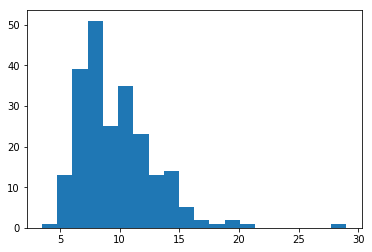

In [157]:
plt.hist(beer_review[['name', 'abv']].drop_duplicates()[(beer_review.abv != 'not listed') & (beer_review.abv != '')].abv.astype('float'), bins=20)

In [ ]:
pd.as

In [111]:
beer_review[beer_review.abv == '29.00'][['name', 'beer_type']].drop_duplicates()

,name,beer_type
53519,Samuel Adams Utopias,American Strong Ale


In [115]:
beer_review[beer_review.name == "Samuel Adams Utopias"]

abv              767
author           767
beer_type        767
brewery          767
content          767
date             767
feel             767
location1        767
location2        767
look             767
name             767
overall          767
rank             767
rating           767
rdev             767
score            767
smell            767
taste            767
url_author       767
url_beer           0
url_beer_type      0
url_brewery        0
dtype: int64

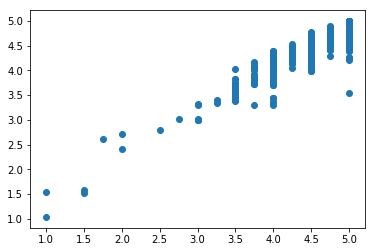

In [120]:
plt.scatter(beer_review[beer_review.name == "Samuel Adams Utopias"].taste, beer_review[beer_review.name == "Samuel Adams Utopias"].score)

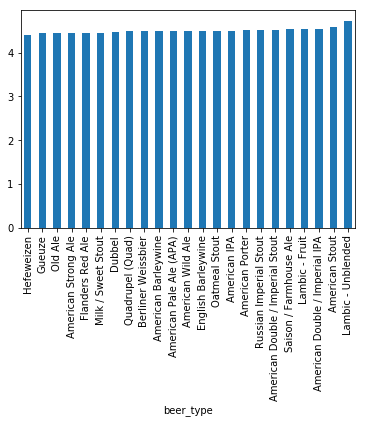

In [149]:
beer_review.groupby('beer_type')['score'].mean().sort_values().plot.bar()

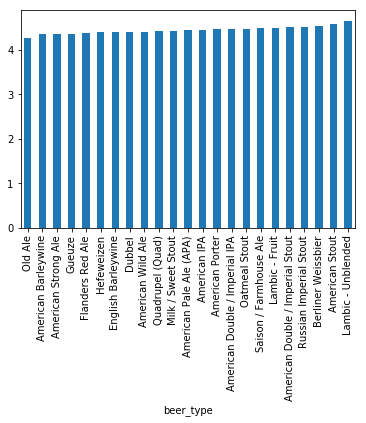

In [125]:
beer_review.groupby('beer_type')['look'].mean().sort_values().plot.bar()

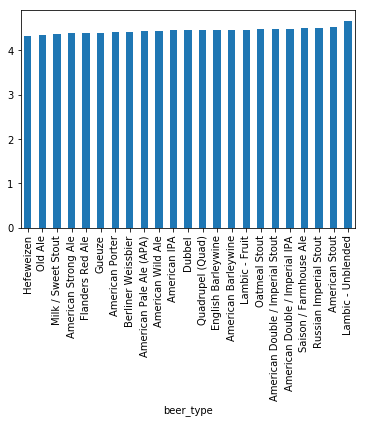

In [127]:
beer_review.groupby('beer_type')['feel'].mean().sort_values().plot.bar()

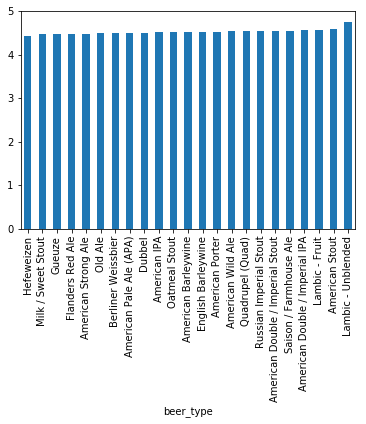

In [128]:
beer_review.groupby('beer_type')['taste'].mean().sort_values().plot.bar()

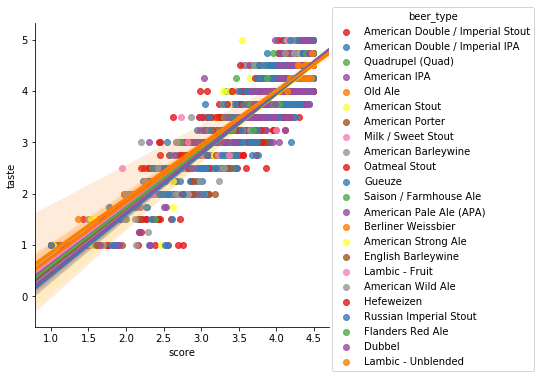

In [136]:
sns.lmplot("score", "taste", beer_review[beer_review.score < 4.5], hue="beer_type", palette='Set1')

In [158]:
beer_review.head(50)

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,12.00,Gtreid,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 18, 2017",5.00,Iowa,United States,4.75,Kentucky Brunch Brand Stout,4.75,1,4.83,-1%,4.78,4.75,4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,12.00,Eiwatts9,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 16, 2017",5.00,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,1,4.83,+3.5%,5.00,5.00,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,12.00,KrajDoesBeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 12, 2017",5.00,Iowa,United States,4.75,Kentucky Brunch Brand Stout,5.00,1,4.83,+2.1%,4.93,4.75,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,12.00,Billy_Bars,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 05, 2017",5.00,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,1,4.83,+2.3%,4.94,4.75,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,12.00,crobinso,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 04, 2017",5.00,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,1,4.83,+3.5%,5.00,5.00,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
5,12.00,billydrinksbeer,American Double / Imperial Stout,Toppling Goliath Brewing Company,Wow. More than lucky to be able to split a bot...,"Oct 04, 2017",5.00,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,1,4.83,+1.4%,4.90,5.00,4.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
6,12.00,Stupac22,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Oct 02, 2017",5.00,Iowa,United States,4.50,Kentucky Brunch Brand Stout,5.00,1,4.83,+0.4%,4.85,4.50,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
7,12.00,SourTweek,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Sep 27, 2017",5.00,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,1,4.83,+3.5%,5.00,5.00,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
8,12.00,Blinkyoureyes,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Sep 19, 2017",5.00,Iowa,United States,5.00,Kentucky Brunch Brand Stout,5.00,1,4.83,+3.5%,5.00,5.00,5.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
9,12.00,Aglassdarkley,American Double / Imperial Stout,Toppling Goliath Brewing Company,,"Sep 11, 2017",2.00,Iowa,United States,3.75,Kentucky Brunch Brand Stout,2.00,1,4.83,-52.6%,2.29,2.75,2.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


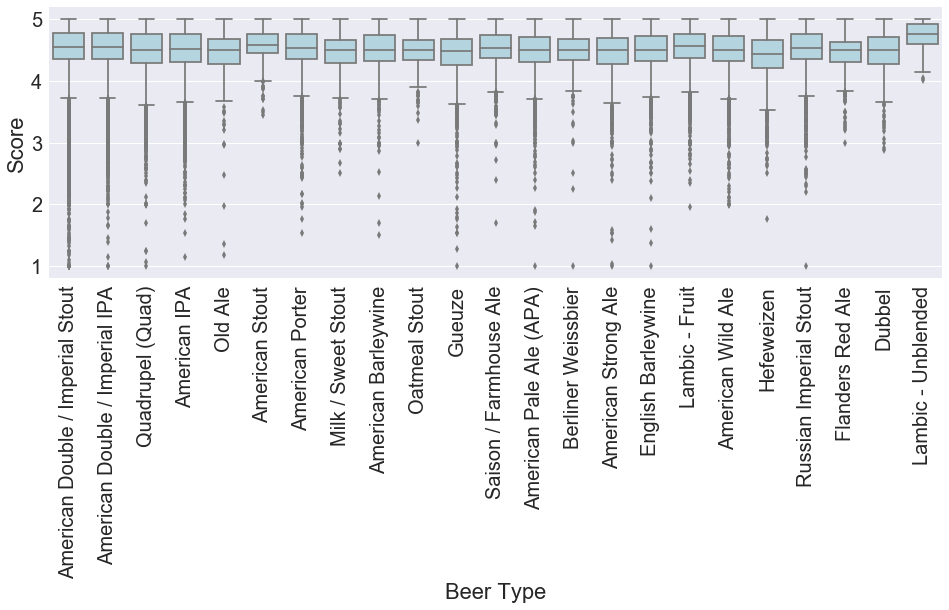

In [245]:

beer_box = beer_review[['beer_type', 'score']]
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=beer_box, x='beer_type', y='score', color='lightblue')
ax.set(xlabel="Beer Type",ylabel="Score")
plt.xticks(rotation=90)
sns.set(font_scale=2)


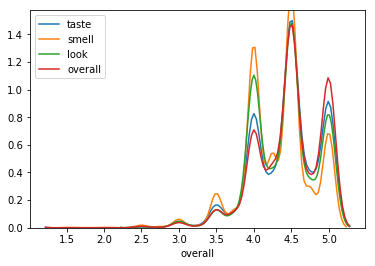

In [200]:
#sns.distplot(beer_review[beer_review.beer_type == 'Hefeweizen'].score, hist=False,label='score')
sns.distplot(beer_review[beer_review.beer_type == 'Hefeweizen'].taste, hist=False, label = 'taste')
sns.distplot(beer_review[beer_review.beer_type == 'Hefeweizen'].smell, hist=False, label = 'smell')
sns.distplot(beer_review[beer_review.beer_type == 'Hefeweizen'].look, hist=False, label = 'look')
sns.distplot(beer_review[beer_review.beer_type == 'Hefeweizen'].overall, hist=False, label = 'overall')

In [167]:
beer_review[beer_review.name == 'Hefeweizen']


,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery


In [174]:
new_beers = pd.read_csv('/Users/ilyasshomayev/work/projects/style_review/style_reviews.csv')

In [175]:
new_beers.shape

(543057, 22)

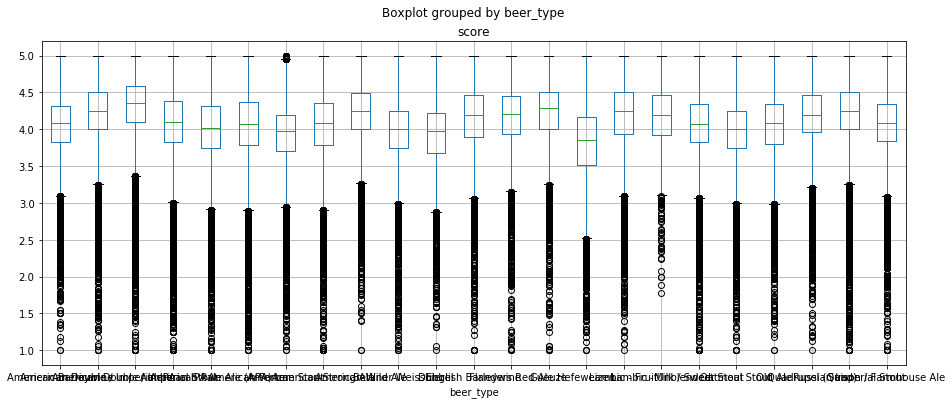

In [176]:
beer_1 = new_beers[['beer_type', 'score']]
beer_1.boxplot(by='beer_type', column='score', figsize=(15,6))

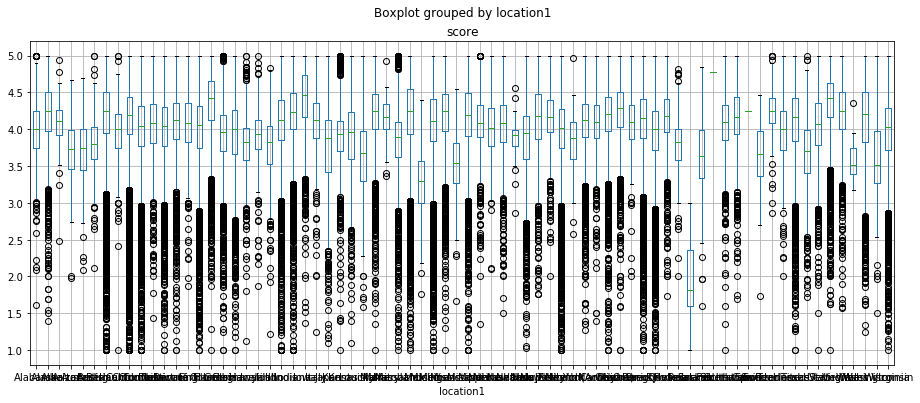

In [204]:
beer_1 = new_beers[['location1', 'score']]
beer_1.boxplot(by='location1', column='score', figsize=(15,6))

In [179]:
new_beers.location1.unique()

array(['Michigan', 'England', 'Oregon', 'California', 'New Hampshire',
       'Missouri', 'Massachusetts', 'Germany', 'Texas', 'Alaska',
       'Vermont', 'Belgium', 'Oklahoma', 'Colorado', 'Wisconsin',
       'Pennsylvania', 'North Carolina', 'Virginia', 'Connecticut',
       'New York', 'Illinois', 'Denmark', 'Louisiana', 'Japan',
       'British Columbia', 'Maryland', 'Minnesota', 'Maine', 'Ontario',
       'Scotland', 'Florida', 'Iowa', 'Ohio', 'Indiana', 'New Jersey',
       'Georgia', 'South Carolina', 'Norway', 'Austria', 'Netherlands',
       'Washington', 'Kentucky', 'District of Columbia', 'Quebec',
       'Alabama', 'Romania', 'United States', 'Arizona', 'Switzerland',
       'Mississippi', 'New Mexico', 'Idaho', 'Manitoba', 'Tennessee',
       'Australia', 'Italy', 'Nebraska', 'Delaware', 'Kansas',
       'West Virginia', 'New Zealand (Aotearoa)', 'Montana', 'Iceland',
       'Sweden', 'Mexico', 'Wales', 'Russian Federation', 'Utah', 'Spain',
       'Saskatchewan', 'Rhode I

(array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5]),
 <a list of 11 Text xticklabel objects>)

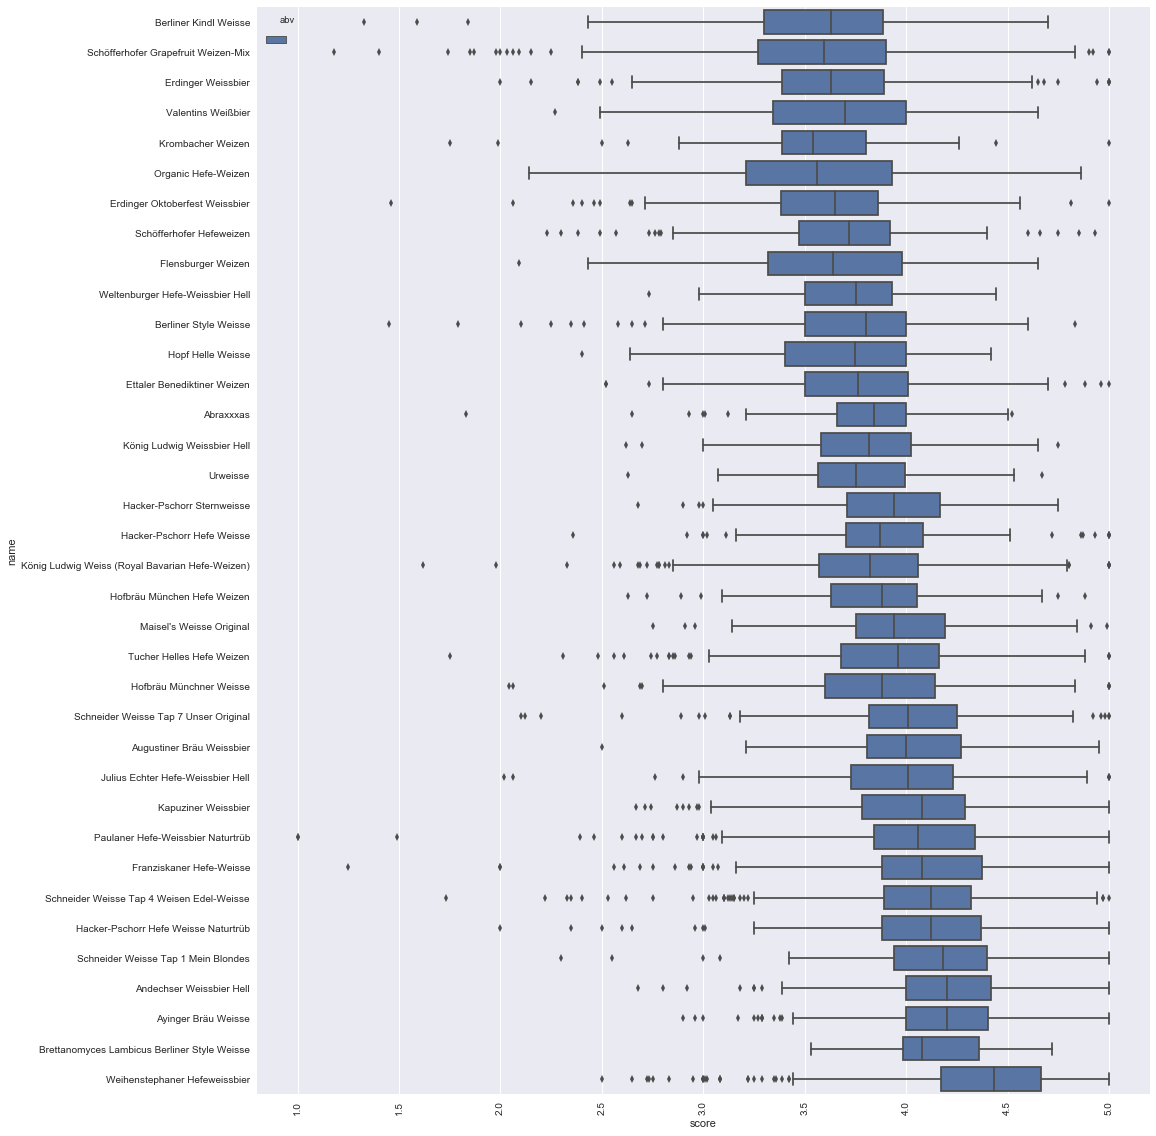

In [236]:
plt.figure(figsize=(16,20))

denmark = new_beers[new_beers.location1 =="Germany"].sort_values(by='rating')
#denmark.abv = denmark.abv.astype('float', errors='ignore')
denplot = sns.boxplot(data=denmark, y='name', x='score', orient='h', hue = 'abv')#,palette=sns.palplot(sns.color_palette("Blues")), )
plt.xticks(rotation=90)

In [227]:
sns.set()

In [239]:
new_beers.abv.str.replace('')

0          10.20%\n\t\t
1          10.20%\n\t\t
2          10.20%\n\t\t
3          10.20%\n\t\t
4          10.20%\n\t\t
5          10.20%\n\t\t
6          10.20%\n\t\t
7          10.20%\n\t\t
8          10.20%\n\t\t
9          10.20%\n\t\t
10         10.20%\n\t\t
11         10.20%\n\t\t
12         10.20%\n\t\t
13         10.20%\n\t\t
14         10.20%\n\t\t
15         10.20%\n\t\t
16         10.20%\n\t\t
17         10.20%\n\t\t
18         10.20%\n\t\t
19         10.20%\n\t\t
20         10.20%\n\t\t
21         10.20%\n\t\t
22         10.20%\n\t\t
23         10.20%\n\t\t
24         10.20%\n\t\t
25          5.60%\n\t\t
26         12.00%\n\t\t
27          5.60%\n\t\t
28          5.60%\n\t\t
29          5.60%\n\t\t
              ...      
543027      6.50%\n\t\t
543028      6.50%\n\t\t
543029      6.50%\n\t\t
543030      6.50%\n\t\t
543031      6.50%\n\t\t
543032      6.50%\n\t\t
543033      6.50%\n\t\t
543034      6.50%\n\t\t
543035      6.50%\n\t\t
543036      6.50%\n\t\t
543037      6.50

len(new_beers.author.unique())